# Food Desert Investigation -- Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('clean_combined.csv')

In [3]:
df.head()

,FIPS,State,County,CACFP_PART_2016,CONVS16,CONVSPTH16,FFR16,FFRPTH16,FSR16,FSRPTH16,...,50_percent_of_poverty_level,125_percent_of_poverty_level,150_percent_of_poverty_level,185_percent_of_poverty_level,200_percent_of_poverty_level,300_percent_of_poverty_level,400_percent_of_poverty_level,500_percent_of_poverty_level,"Worked_full-time,_year-round_in_the_past_12_months.1","Worked_less_than_full-time,_year-round_in_the_past_12_months"
0,1001,AL,autauga,59447.5,31,0,44,0,31,0,...,356387,1058934,1299603,1636651,1760117,2583126,3241666,3720507,315932,161509
1,1003,AL,baldwin,59447.5,118,0,156,0,236,1,...,356387,1058934,1299603,1636651,1760117,2583126,3241666,3720507,315932,161509
2,1005,AL,barbour,59447.5,19,0,23,0,14,0,...,356387,1058934,1299603,1636651,1760117,2583126,3241666,3720507,315932,161509
3,1007,AL,bibb,59447.5,15,0,7,0,7,0,...,356387,1058934,1299603,1636651,1760117,2583126,3241666,3720507,315932,161509
4,1009,AL,blount,59447.5,27,0,23,0,12,0,...,356387,1058934,1299603,1636651,1760117,2583126,3241666,3720507,315932,161509


In [4]:
df.describe()

,FIPS,CACFP_PART_2016,CONVS16,CONVSPTH16,FFR16,FFRPTH16,FSR16,FSRPTH16,GROC16,GROCPTH16,...,50_percent_of_poverty_level,125_percent_of_poverty_level,150_percent_of_poverty_level,185_percent_of_poverty_level,200_percent_of_poverty_level,300_percent_of_poverty_level,400_percent_of_poverty_level,500_percent_of_poverty_level,"Worked_full-time,_year-round_in_the_past_12_months.1","Worked_less_than_full-time,_year-round_in_the_past_12_months"
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,...,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03
mean,30387.632484,129608.522452,40.391083,0.083121,75.765924,0.050318,78.621975,0.235669,20.821975,0.017834,...,5.465840e+05,1.647481e+06,2.041365e+06,2.596777e+06,2.822743e+06,4.252861e+06,5.384274e+06,6.266333e+06,6.975438e+05,3.471426e+05
std,15156.372045,154721.098857,97.056911,0.301481,268.964930,0.252449,270.112658,0.587543,90.238333,0.148263,...,5.338903e+05,1.662759e+06,2.067615e+06,2.622327e+06,2.847880e+06,4.198959e+06,5.196611e+06,5.972514e+06,6.455493e+05,3.056276e+05
min,1001.000000,7532.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.481000e+04,8.460100e+04,1.111030e+05,1.465250e+05,1.611700e+05,2.590810e+05,3.259970e+05,3.763910e+05,4.991600e+04,3.213800e+04
25%,18178.500000,43433.750000,7.000000,0.000000,5.000000,0.000000,7.000000,0.000000,2.000000,0.000000,...,2.139460e+05,6.740360e+05,8.522900e+05,1.069618e+06,1.162611e+06,1.686375e+06,2.075758e+06,2.355254e+06,2.450870e+05,1.305970e+05
50%,29176.000000,71045.000000,15.000000,0.000000,15.000000,0.000000,18.000000,0.000000,5.000000,0.000000,...,3.640940e+05,1.101741e+06,1.375335e+06,1.681032e+06,1.795293e+06,2.583126e+06,3.390604e+06,4.112519e+06,5.268970e+05,2.749560e+05
75%,45079.500000,127954.500000,35.250000,0.000000,45.000000,0.000000,48.250000,0.000000,12.000000,0.000000,...,7.274710e+05,2.084319e+06,2.576268e+06,3.250797e+06,3.533569e+06,5.275767e+06,6.607871e+06,7.604573e+06,7.993500e+05,4.315970e+05
max,56045.000000,595088.250000,2199.000000,3.000000,8264.000000,5.000000,8113.000000,11.000000,2495.000000,3.000000,...,2.389302e+06,7.372644e+06,9.133390e+06,1.159911e+07,1.260355e+07,1.864638e+07,2.317994e+07,2.677814e+07,2.968952e+06,1.639974e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 74 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   FIPS                                                          3140 non-null   int64  
 1   State                                                         3140 non-null   object 
 2   County                                                        3140 non-null   object 
 3   CACFP_PART_2016                                               3140 non-null   float64
 4   CONVS16                                                       3140 non-null   int64  
 5   CONVSPTH16                                                    3140 non-null   int64  
 6   FFR16                                                         3140 non-null   int64  
 7   FFRPTH16                                                      3140 no

## Dependent Variable

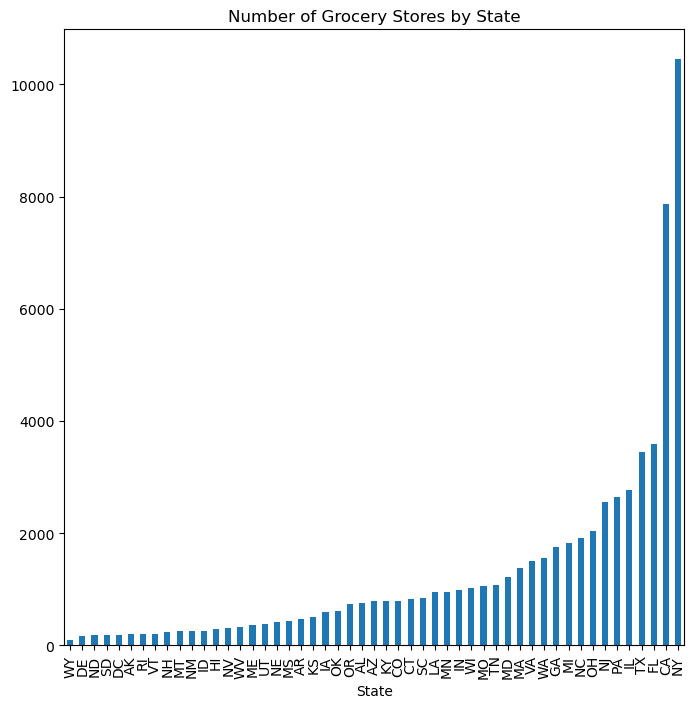

In [18]:
plt.figure(figsize=(8,8))
groc_by_state = df.groupby("State")['GROC16'].sum().sort_values(ascending=True)
groc_by_state.plot(kind="bar", title="Number of Grocery Stores by State")
plt.show()

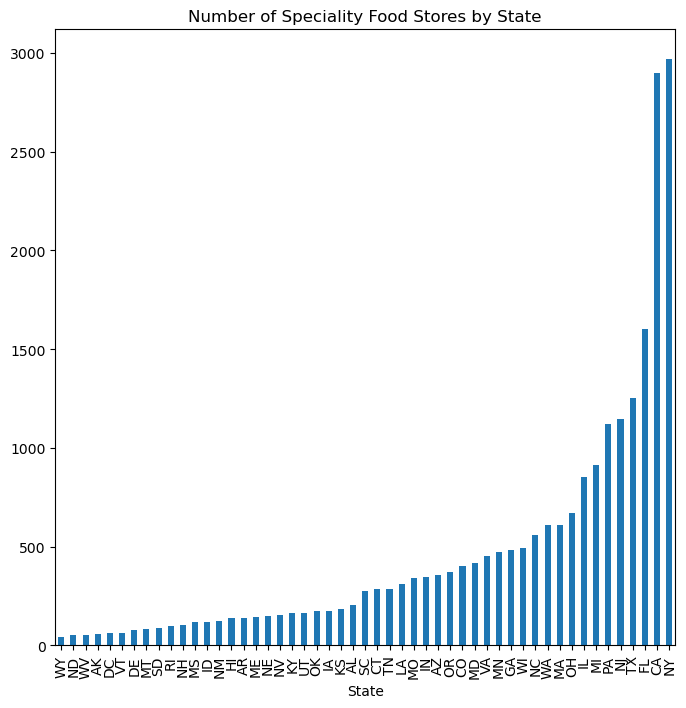

In [19]:
plt.figure(figsize=(8,8))
spec_by_state = df.groupby("State")['SPECS16'].sum().sort_values(ascending=True)
spec_by_state.plot(kind="bar", title="Number of Speciality Food Stores by State")
plt.show()

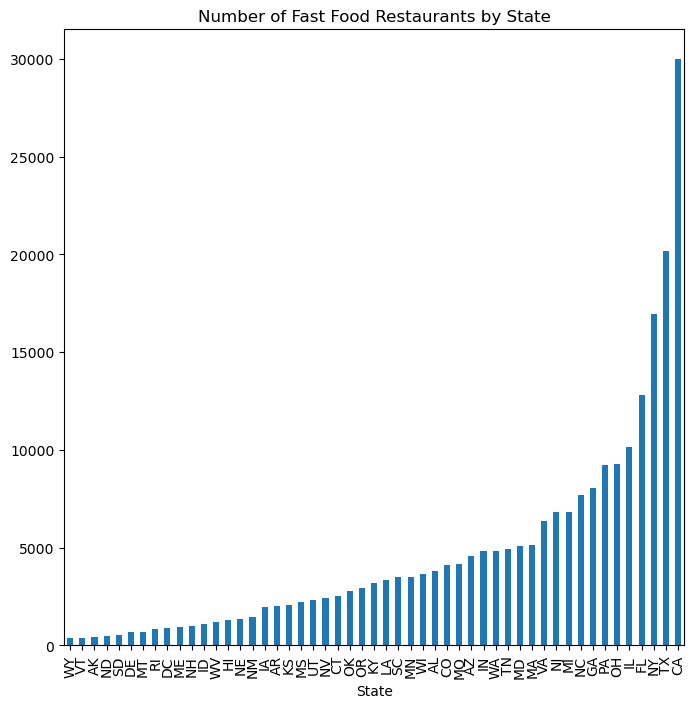

In [24]:
plt.figure(figsize=(8,8))
ff_by_state = df.groupby("State")['FFR16'].sum().sort_values(ascending=True)
ff_by_state.plot(kind="bar", title="Number of Fast Food Restaurants by State")
plt.show()